In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%precision 3
%matplotlib inline

In [10]:
dice = [1,2,3,4,5,6]
prob = [1/21,2/21,3/21,4/21,5/21,6/21]

In [11]:
np.random.choice(dice, p = prob)

6

In [23]:
num_trial = 100000
sample = np.random.choice(dice, num_trial,p = prob)
sample

array([1, 5, 6, ..., 6, 4, 4])

In [27]:
freq,_ = np.histogram(sample, bins = 6, range = (1,7))
pd.DataFrame({'frequency':freq,'relative frequency':freq/num_trial}, index = pd.Index(np.arange(1,7), name = 'dice'))

,frequency,relative frequency
dice,,
1,4739,0.04739
2,9494,0.09494
3,14147,0.14147
4,18949,0.18949
5,23861,0.23861
6,28810,0.28810


Text(0, 0.5, 'relative frequency')

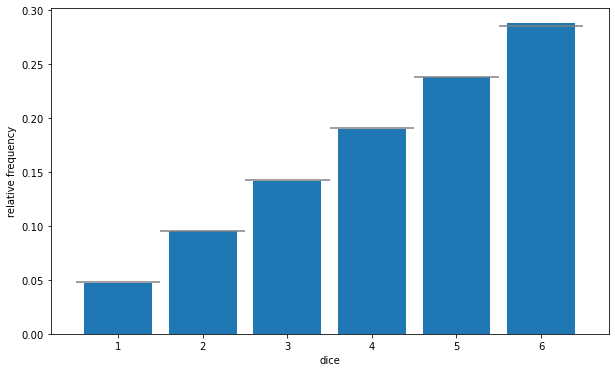

In [29]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.hist(sample, bins = 6, range = (1,7), density = True, rwidth = 0.8)
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors = 'gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
#plt.show()

In [13]:
x_set = np.array([1,2,3,4,5,6])

In [14]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [15]:
X = [x_set,f]

In [16]:
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [17]:
prob = np.array([f(x_k) for x_k in x_set])

In [18]:
dict(zip(x_set,prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

In [19]:
np.all(prob >= 0)

True

In [20]:
np.sum(prob)

0.9999999999999999

In [22]:
np.sum([x_k * f(x_k)for x_k in x_set])

4.333333333333333

In [27]:
sample = np.random.choice(x_set, int(1e6),p = prob)
sample

array([4, 4, 2, ..., 6, 5, 5])

In [28]:
np.random.choice(x_set, 100)

array([6, 1, 5, 2, 6, 2, 6, 3, 1, 1, 2, 5, 1, 6, 4, 1, 6, 1, 1, 4, 3, 1,
       3, 5, 6, 5, 2, 4, 1, 6, 5, 6, 4, 6, 2, 6, 3, 3, 1, 5, 4, 1, 1, 2,
       3, 5, 3, 4, 2, 5, 6, 2, 3, 3, 5, 5, 4, 1, 2, 2, 4, 6, 1, 5, 5, 1,
       5, 5, 2, 2, 6, 4, 2, 1, 6, 5, 1, 2, 4, 1, 3, 3, 1, 1, 5, 3, 6, 3,
       3, 4, 1, 6, 2, 6, 3, 2, 4, 2, 1, 4])

### np.random.choice(a, size = none, p = none) size : 몇개까지 뽑을 건가 p 를 지정해주지 않으면 모든 원소가 뽑힐 확률이 동일 ( p = 1/N)

In [29]:
np.mean(sample)

4.333953

In [32]:
def E(X,g = lambda x: x):
    x_set, f = X
    return np.sum([g(x_k)*f(x_k) for x_k in x_set])

In [33]:
E(X)

4.333333333333333

In [34]:
E(X,g = lambda x:2*x + 3)

11.666666666666664

In [35]:
2*E(X)+3

11.666666666666666

In [36]:
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k)for x_k in x_set])

2.2222222222222223

In [41]:
def V(X, g = lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k)for x_k in x_set])

In [46]:
V(X)

2.2222222222222223

In [45]:

V(X, lambda x :2*x +3)

8.88888888888889

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

## 함수들

In [ ]:
def E(X, g = lambda x:x):
    x_set,f = x
    return np.sum([g(x_k) *f(x_k) for x_k in x_set])
def V(X, g = lambda x:x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(g(x_k)-mean)]**2 * f(x_k) for x_k in x_set)
def check_prob(X):
    x_set, f = X
    